# Data Wrangling

# Laptop Pricing

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv",header=0)

In [102]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB
None


In [103]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [104]:
df[["Screen_Size_cm"]] = np.round(df[["Screen_Size_cm"]],2)

In [105]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


# Task - 1
## Evaluate the dataset for missing data
Missing data was last converted from '?' to numpy.NaN. Pandas uses NaN and Null values interchangeably. This means, you can just identify the entries having Null values. Write a code that identifies which columns have missing data.

In [106]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(missing_data[column].value_counts())
    print("")

Unnamed: 0
False    238
Name: count, dtype: int64

Manufacturer
False    238
Name: count, dtype: int64

Category
False    238
Name: count, dtype: int64

Screen
False    238
Name: count, dtype: int64

GPU
False    238
Name: count, dtype: int64

OS
False    238
Name: count, dtype: int64

CPU_core
False    238
Name: count, dtype: int64

Screen_Size_cm
False    234
True       4
Name: count, dtype: int64

CPU_frequency
False    238
Name: count, dtype: int64

RAM_GB
False    238
Name: count, dtype: int64

Storage_GB_SSD
False    238
Name: count, dtype: int64

Weight_kg
False    233
True       5
Name: count, dtype: int64

Price
False    238
Name: count, dtype: int64



# Task - 2
## Replace with mean
Missing values in attributes that have continuous data are best replaced using Mean value. We note that values in "Weight_kg" attribute are continuous in nature, and some values are missing. Therefore, write a code to replace the missing values of weight with the average value of the attribute.

In [107]:
avg_weight = df['Weight_kg'].astype('float').mean(axis = 0)
df['Weight_kg'].replace(np.NaN, avg_weight, inplace = True)

## Replace with the most frequent value
Missing values in attributes that have categorical data are best replaced using the most frequent value. We note that values in "Screen_Size_cm" attribute are categorical in nature, and some values are missing. Therefore, write a code to replace the missing values of Screen Size with the most frequent value of the attribute.

In [108]:
max_Size = df['Screen_Size_cm'].value_counts().idxmax()

In [109]:
df['Screen_Size_cm'].replace(np.NaN, max_Size, inplace = True)

In [110]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(missing_data[column].value_counts())
    print("")

Unnamed: 0
False    238
Name: count, dtype: int64

Manufacturer
False    238
Name: count, dtype: int64

Category
False    238
Name: count, dtype: int64

Screen
False    238
Name: count, dtype: int64

GPU
False    238
Name: count, dtype: int64

OS
False    238
Name: count, dtype: int64

CPU_core
False    238
Name: count, dtype: int64

Screen_Size_cm
False    238
Name: count, dtype: int64

CPU_frequency
False    238
Name: count, dtype: int64

RAM_GB
False    238
Name: count, dtype: int64

Storage_GB_SSD
False    238
Name: count, dtype: int64

Weight_kg
False    238
Name: count, dtype: int64

Price
False    238
Name: count, dtype: int64



# Task - 3
## Fixing the data types
Both "Weight_kg" and "Screen_Size_cm" are seen to have the data type "Object", while both of them should be having a data type of "float". Write a code to fix the data type of these two columns.

In [111]:
df[["Weight_kg","Screen_Size_cm"]] = df[["Weight_kg","Screen_Size_cm"]].astype("float")

# Task - 4
## Data Standardization
The value of Screen_size usually has a standard unit of inches. Similarly, weight of the laptop is needed to be in pounds. Use the below mentioned units of conversion and write a code to modify the columns of the dataframe accordingly. Update their names as well.

1 inch = 2.54 cm
1 kg   = 2.205 pounds

In [112]:
df["Weight_kg"] = 2.205*df["Weight_kg"]
df.rename(columns = {"Weight_kg" : "Weight_Pounds"}, inplace = True)

df["Screen_Size_cm"] = df["Screen_Size_cm"]/2.54
df.rename(columns = {"Screen_Size_cm" : "Screen_Size_inch"}, inplace = True)

In [113]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_Pounds,Price
0,0,Acer,4,IPS Panel,2,1,5,14.000000,1.6,8,256,3.52800,978
1,1,Dell,3,Full HD,1,1,3,15.598425,2.0,4,256,4.85100,634
2,2,Dell,3,Full HD,1,1,7,15.598425,2.7,8,256,4.85100,946
3,3,Dell,4,IPS Panel,2,1,5,13.299213,1.6,8,128,2.69010,1244
4,4,HP,4,Full HD,2,1,7,15.598425,1.8,8,256,4.21155,837


# Data Normalization
Often it is required to normalize a continuous data attribute. Write a code to normalize the "CPU_frequency" attribute with respect to the maximum value available in the dataset.

In [114]:
df["CPU_frequency"] = df['CPU_frequency']/df['CPU_frequency'].max()
df[["CPU_frequency"]]

,CPU_frequency
0,0.551724
1,0.689655
2,0.931034
3,0.551724
4,0.620690
...,...
233,0.896552
234,0.827586
235,0.896552
236,0.862069


# Task - 5 
## Binning
Binning is a process of creating a categorical attribute which splits the values of a continuous data into a specified number of groups. In this case, write a code to create 3 bins for the attribute "Price". These bins would be named "Low", "Medium" and "High". The new attribute will be named "Price-binned".

In [115]:
bins = np.linspace(min(df["Price"]),max(df["Price"]),4)
group_names = ["Low","Medium","Maximum"]
df['Price_binned']=pd.cut(df['Price'], bins, labels=group_names, include_lowest = True)

# Plotting Bins

Text(0.5, 1.0, 'Price Bins')

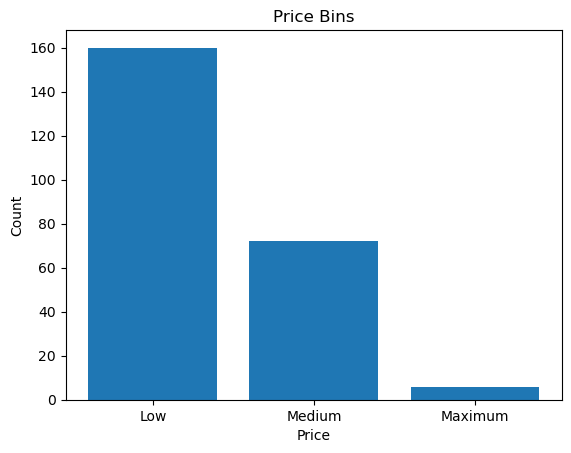

In [116]:
plt.bar(group_names, df['Price_binned'].value_counts())
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Price Bins')

# Task - 6
## Indicator variables
Convert the "Screen" attribute of the dataset into 2 indicator variables, "Screen-IPS_panel" and "Screen-Full_HD". Then drop the "Screen" attribute from the dataset.

In [117]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_Pounds,Price,Price_binned
0,0,Acer,4,IPS Panel,2,1,5,14.000000,0.551724,8,256,3.52800,978,Low
1,1,Dell,3,Full HD,1,1,3,15.598425,0.689655,4,256,4.85100,634,Low
2,2,Dell,3,Full HD,1,1,7,15.598425,0.931034,8,256,4.85100,946,Low
3,3,Dell,4,IPS Panel,2,1,5,13.299213,0.551724,8,128,2.69010,1244,Low
4,4,HP,4,Full HD,2,1,7,15.598425,0.620690,8,256,4.21155,837,Low


In [ ]:
dummy1 = pd.get_dummies(df["Screen"])
dummy1.rename(columns = {'IPS Panel' : 'Screen-IPS_panel','Full HD':'Screen-Full_HD'}, inplace = True)
pd.concat([df, dummy1], axis=1)
df.drop('Screen',axis = 1, inplace = True)

In [119]:
df.head()

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_Pounds,Price,Price_binned
0,0,Acer,4,2,1,5,14.000000,0.551724,8,256,3.52800,978,Low
1,1,Dell,3,1,1,3,15.598425,0.689655,4,256,4.85100,634,Low
2,2,Dell,3,1,1,7,15.598425,0.931034,8,256,4.85100,946,Low
3,3,Dell,4,2,1,5,13.299213,0.551724,8,128,2.69010,1244,Low
4,4,HP,4,2,1,7,15.598425,0.620690,8,256,4.21155,837,Low


In [124]:
df.drop('Unnamed: 0',axis = 1, inplace = True)
df.head()

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_Pounds,Price,Price_binned
0,Acer,4,2,1,5,14.000000,0.551724,8,256,3.52800,978,Low
1,Dell,3,1,1,3,15.598425,0.689655,4,256,4.85100,634,Low
2,Dell,3,1,1,7,15.598425,0.931034,8,256,4.85100,946,Low
3,Dell,4,2,1,5,13.299213,0.551724,8,128,2.69010,1244,Low
4,HP,4,2,1,7,15.598425,0.620690,8,256,4.21155,837,Low
